# Data Science Pricing Analyst Internship - Coding Exercise 
### - Pratik Deshmukh

Saturday, 2nd April 2022

In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
from pandas.tseries.frequencies import to_offset #for converting datetime index from daily to weekly
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Set to 2 decimal places, and display all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

## <u> Part 1</u> : Preparing the data

Lets load the data

There are Two main datasets available - Transaction Line Data and Costs data

In [4]:
df_tld = pd.read_csv('Transaction_Line_Data.csv',index_col=0)

In [5]:
df_tld.head()

,Product_ID,Category_ID,Transaction_ID,Sales,Units
SalesDate,,,,,
5/1/2017,1556123,1442,4393412335,23,1
5/1/2017,2616945,1435,4393412335,10,1
5/1/2017,2616945,1435,4393412335,10,1
5/1/2017,3465709,1423,4393412335,470,1
5/1/2017,3446931,1423,4393412751,346,1


In [6]:
len(df_tld)

374143

In [7]:
df_c = pd.read_csv('Costs.csv')

In [8]:
df_c.head()

,Product_ID,Category_ID,Cost
0,1202629,1929,12.00
1,1202920,2050,3.00
2,1203199,2027,4.00
3,1208416,1874,2.00
4,1211713,1825,2.00


In [9]:
len(df_c)

11444

Since we know that the Product_ID column is common, lets combine the two data sets into one. The transaction data is very important to analyze sales, lets retain all of that, and add in the Cost of per product to that table by utilising a left merge.

But before that, we must check the integrity of the data between the two datasets. Does the same Category_ID have the same Product_IDs? (We are interested in the category with ID "1423")

In [10]:
(df_tld[df_tld.Category_ID==1423]).Product_ID.unique()

array([3465709, 3446931, 3463743, 3464614, 3476499, 3463745, 3446933,
       3650564, 3476700, 3463744, 2004295, 3464615, 2964273, 3446932,
       3588034, 3597259, 3650563, 3699889, 3655356, 3699880, 3709203,
       3476701, 3726751, 3476703, 3463746, 3142321, 3476702, 2875083,
       3699874, 2906448, 3650562, 3588035, 3699881, 3597257, 3699888,
       2942416, 3699882, 3699886, 3699871, 3772171, 2861793, 3588050,
       3699870, 2906450, 2988401, 3910992, 3910528, 3910996, 3910527,
       3910997, 3910995, 3910526, 3116246, 3910994, 3910993, 3913527,
       3597176, 3597230, 2875090, 3913525, 3926443, 3913529, 3772160,
       3597179, 3951415, 3946820, 2360207, 3913526, 3913528, 3950788,
       3913524, 3951416, 3962759, 3972062, 3116247, 3954592, 3976051,
       2875082, 3990110, 3990345, 3990215, 3990080, 3990029, 3990226,
       3990173, 3989963, 3990344, 3962758, 3990225, 3986457, 3954162,
       3990342, 3990228, 3989950, 3990154, 3950854, 3990124, 3990331,
       3989985, 3990

In [11]:
(df_tld[df_tld.Category_ID==1423]).Product_ID.nunique()

104

In [12]:
(df_c[df_c.Category_ID==1423]).Product_ID.unique()

array([2004295, 2360207, 2861793, 2875082, 2875083, 2875090, 2906448,
       2906450, 2942416, 2964273, 2988401, 3116246, 3116247, 3142321,
       3446931, 3446932, 3446933, 3463743, 3463744, 3463745, 3463746,
       3464614, 3464615, 3465709, 3476499, 3476700, 3476701, 3476702,
       3476703, 3588034, 3588035, 3588050, 3597176, 3597179, 3597230,
       3597257, 3597259, 3650562, 3650563, 3650564, 3655356, 3699870,
       3699871, 3699874, 3699880, 3699881, 3699882, 3699886, 3699888,
       3699889, 3709203, 3726751, 3772160, 3772171, 3910526, 3910527,
       3910528, 3910992, 3910993, 3910994, 3910995, 3910996, 3910997,
       3913524, 3913525, 3913526, 3913527, 3913528, 3913529, 3926443,
       3946820, 3950788, 3950854, 3951415, 3951416, 3954162, 3954592,
       3962758, 3962759, 3972062, 3976051, 3976158, 3986457, 3989950,
       3989963, 3989974, 3989985, 3990029, 3990080, 3990110, 3990124,
       3990154, 3990173, 3990180, 3990215, 3990225, 3990226, 3990228,
       3990326, 3990

In [13]:
(df_c[df_c.Category_ID==1423]).Product_ID.nunique()

104

Lets see if they match.

In [14]:
tld_prodIDs_sorted=(df_tld[df_tld.Category_ID==1423]).Product_ID.unique().sort()

In [15]:
c_prodIDs_sorted=(df_c[df_c.Category_ID==1423]).Product_ID.unique().sort()

In [16]:
tld_prodIDs_sorted==c_prodIDs_sorted

True

The data is consistent!

We can now use the left merge to combine the data into one df

In [17]:
df=pd.merge(df_tld,df_c,on='Product_ID')

In [18]:
df.head()

,Product_ID,Category_ID_x,Transaction_ID,Sales,Units,Category_ID_y,Cost
0,1556123,1442,4393412335,23,1,1442,12.00
1,1556123,1442,4393829655,23,1,1442,12.00
2,1556123,1442,4393943402,23,1,1442,12.00
3,1556123,1442,4394006317,23,1,1442,12.00
4,1556123,1442,4394193435,23,1,1442,12.00


In [19]:
len(df)

374143

In [20]:
len(df)==len(df_tld)

True

In [21]:
df.head(2)

,Product_ID,Category_ID_x,Transaction_ID,Sales,Units,Category_ID_y,Cost
0,1556123,1442,4393412335,23,1,1442,12.00
1,1556123,1442,4393829655,23,1,1442,12.00


We can drop one of the duplicate columns.

In [22]:
df.drop(columns=['Category_ID_x'], inplace=True)

In [23]:
df.rename(columns={'Category_ID_y':'Category_ID'}, inplace=True)

In [24]:
df.head()

,Product_ID,Transaction_ID,Sales,Units,Category_ID,Cost
0,1556123,4393412335,23,1,1442,12.00
1,1556123,4393829655,23,1,1442,12.00
2,1556123,4393943402,23,1,1442,12.00
3,1556123,4394006317,23,1,1442,12.00
4,1556123,4394193435,23,1,1442,12.00


## <u> Part 2</u> : Finding which products are important in the category "1423" and find top 5 of those products.

Since we are only interested in data within the category <b>"1423"</b>, lets filter it out.

In [25]:
df=df[df.Category_ID==1423]

In [26]:
df.head()

,Product_ID,Transaction_ID,Sales,Units,Category_ID,Cost
355,3465709,4393412335,470,1,1423,254.00
356,3465709,4393415854,470,1,1423,254.00
357,3465709,4393423348,520,1,1423,254.00
358,3465709,4393432080,470,1,1423,254.00
359,3465709,4393435064,470,1,1423,254.00


In [27]:
len(df)

84521

The factors for determining which products are <b>important</b> could be as follows (in the given sequence of importance) - 
1. Highest number of sales of that product (Count of <b>Transaction_IDs</b> for each Product_ID) 
2. Sales generated for the product are high within a transaction (<b>Sales</b> generated from units sold of the Product)
3. Number of <b>units</b> sold in each transaction 
4. Staples' <b>Cost</b> for single unit is higher 

Lets find top 5 products that satisfy these conditions.

First, for each product, we need to count the number of transactions. 

In [28]:
transaction_count=pd.DataFrame(df.groupby('Product_ID')['Transaction_ID'].count()).reset_index()

In [29]:
transaction_count.head()

,Product_ID,Transaction_ID
0,2004295,493
1,2360207,1
2,2861793,1
3,2875082,1
4,2875083,2


In [30]:
transaction_count.rename(columns={'Transaction_ID':'Transaction_ID_count'}, inplace=True)

We want to add this transaction count to the dataframe for each Product_ID.

In [31]:
df=pd.merge(df,transaction_count,on='Product_ID')

In [32]:
df.head()

,Product_ID,Transaction_ID,Sales,Units,Category_ID,Cost,Transaction_ID_count
0,3465709,4393412335,470,1,1423,254.00,3103
1,3465709,4393415854,470,1,1423,254.00,3103
2,3465709,4393423348,520,1,1423,254.00,3103
3,3465709,4393432080,470,1,1423,254.00,3103
4,3465709,4393435064,470,1,1423,254.00,3103


Now, lets sort the values in the order of importance as mentioned above.

In [33]:
df.sort_values(['Transaction_ID_count','Sales','Units','Cost'], ascending=[False, False, False, False])\
    .groupby('Product_ID').head(1)

,Product_ID,Transaction_ID,Sales,Units,Category_ID,Cost,Transaction_ID_count
28997,3910992,4447473651,2120,4,1423,261.00,14837
77005,3910526,4445130155,1900,4,1423,262.00,9956
36631,3910528,4418837237,1880,4,1423,232.00,9087
54081,3910996,4473151996,3200,5,1423,303.00,8689
70414,3910995,4461541079,2828,4,1423,382.00,8068
...,...,...,...,...,...,...,...
21550,2942416,4404714289,250,1,1423,135.00,1
84484,2875082,4463806825,200,1,1423,108.00,1
21665,2861793,4409579033,144,1,1423,78.00,1
19165,3709203,4396485741,117,1,1423,63.00,1


In [34]:
sorted_df=df.sort_values(['Transaction_ID_count','Sales','Units','Cost'], ascending=[False, False, False, False])\
    .groupby('Product_ID').head(1)

In [35]:
sorted_df.head()

,Product_ID,Transaction_ID,Sales,Units,Category_ID,Cost,Transaction_ID_count
28997,3910992,4447473651,2120,4,1423,261.00,14837
77005,3910526,4445130155,1900,4,1423,262.00,9956
36631,3910528,4418837237,1880,4,1423,232.00,9087
54081,3910996,4473151996,3200,5,1423,303.00,8689
70414,3910995,4461541079,2828,4,1423,382.00,8068


In [36]:
top_products = sorted_df.head().Product_ID.to_list()

In [37]:
top_products

[3910992, 3910526, 3910528, 3910996, 3910995]

These are the top 5 Products based on above assumptions. Now, forecast the number of units sold per week for 8 weeks following week ending in 10/28/17

## <u> Part 3</u> : Preparing data for forecasting / Data cleaning

We need to forecast units sold per week for the top 5 products for <b> 8 weeks </b> following week ending in 10/28/17

Let's start with Product 1, which is -

In [38]:
top_products[0]

3910992

In [39]:
df_tld[df_tld.Product_ID==top_products[0]]

,Product_ID,Category_ID,Transaction_ID,Sales,Units
SalesDate,,,,,
6/19/2017,3910992,1423,4413494691,530,1
6/21/2017,3910992,1423,4414524556,530,1
6/21/2017,3910992,1423,4414548136,530,1
6/21/2017,3910992,1423,4414598511,530,1
6/22/2017,3910992,1423,4414799088,530,1
...,...,...,...,...,...
11/1/2017,3910992,1423,4475803215,494,1
11/1/2017,3910992,1423,4475805577,494,1
11/1/2017,3910992,1423,4475807303,494,1


In [40]:
df_p1=df_tld[df_tld.Product_ID==top_products[0]].copy()

We are only interested in the Sales data.

In [41]:
df_p1.drop(columns=['Product_ID','Category_ID','Transaction_ID','Sales'],inplace=True)

In [42]:
df_p1.head(10)

,Units
SalesDate,
6/19/2017,1
6/21/2017,1
6/21/2017,1
6/21/2017,1
6/22/2017,1
6/22/2017,1
6/22/2017,1
6/22/2017,1
6/22/2017,1


In [43]:
# Converting the index as date format for python
df_p1.index = pd.to_datetime(df_p1.index)

In [44]:
df_p1.head(5)

,Units
SalesDate,
2017-06-19,1
2017-06-21,1
2017-06-21,1
2017-06-21,1
2017-06-22,1


Let's use the same technique for products 2, 3, 4 and 5 as well.

In [45]:
df_p2=df_tld[df_tld.Product_ID==top_products[1]].copy()
df_p2.drop(columns=['Product_ID','Category_ID','Transaction_ID','Sales'],inplace=True)
df_p2.index = pd.to_datetime(df_p2.index)
df_p2.head()

,Units
SalesDate,
2017-06-22,1
2017-06-23,1
2017-06-23,1
2017-06-24,1
2017-06-24,1


In [46]:
df_p3=df_tld[df_tld.Product_ID==top_products[2]].copy()
df_p3.drop(columns=['Product_ID','Category_ID','Transaction_ID','Sales'],inplace=True)
df_p3.index = pd.to_datetime(df_p3.index)
df_p3.head()

,Units
SalesDate,
2017-06-21,1
2017-06-21,1
2017-06-22,1
2017-06-22,1
2017-06-23,1


In [47]:
df_p4=df_tld[df_tld.Product_ID==top_products[3]].copy()
df_p4.drop(columns=['Product_ID','Category_ID','Transaction_ID','Sales'],inplace=True)
df_p4.index = pd.to_datetime(df_p4.index)
df_p4.head()

,Units
SalesDate,
2017-06-21,1
2017-06-22,1
2017-06-23,1
2017-06-24,1
2017-06-24,1


In [48]:
df_p5=df_tld[df_tld.Product_ID==top_products[4]].copy()
df_p5.drop(columns=['Product_ID','Category_ID','Transaction_ID','Sales'],inplace=True)
df_p5.index = pd.to_datetime(df_p5.index)
df_p5.head()

,Units
SalesDate,
2017-06-22,1
2017-06-22,1
2017-06-23,1
2017-06-23,1
2017-06-23,1


Right now, we have multiple entries for each date, lets sum them up to make our data simpler to fit and drive better looking plots.

ReferenceS for the coding technique used to convert data to daily format -
- https://stackoverflow.com/questions/34597926/converting-daily-stock-data-to-weekly-based-via-pandas-in-python
- https://stackoverflow.com/questions/68933144/attributeerror-module-pandas-tseries-offsets-has-no-attribute-timedelta

In [49]:
logic = {'Units':'sum'}
df_p1 = df_p1.resample('D').apply(logic)
df_p2 = df_p2.resample('D').apply(logic)
df_p3 = df_p3.resample('D').apply(logic)
df_p4 = df_p4.resample('D').apply(logic)
df_p5 = df_p5.resample('D').apply(logic)

Sample of what the data looks like -

In [50]:
df_p1.head()

,Units
SalesDate,
2017-06-19,1
2017-06-20,0
2017-06-21,3
2017-06-22,5
2017-06-23,10


## <u> Part 4</u> : Forecasting the future values using fbprophet

After trying several methods including Autorgression, ARMA, ARIMA and SARIMA models and caluclating their RMSE, the results were unsatisfactory. After some more research I found the fbprophet.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. 

References used for fbprophet -

1. Introductory video - https://facebook.github.io/prophet/
2. API information - https://facebook.github.io/prophet/docs/quick_start.html
3. Installation guide - https://medium.com/data-folks-indonesia/installing-fbprophet-prophet-for-time-series-forecasting-in-jupyter-notebook-7de6db09f93e
4. Installation errors debugging - https://stackoverflow.com/questions/49889404/fbprophet-installation-error-failed-building-wheel-for-fbprophet
5. Application example video - https://www.youtube.com/watch?v=AX1wKnBPhvU

Used the following commands / steps to install fbprophet - 

1. Downgraded Python to 3.8 version from 3.9 as fbprophet does not work on 3.9 by creating a new environement 
2. Installed Jupyter Notebook in the new environment
3. Installed c++ compiler
4. Installed dependencies that will be required by Prophet / fbprophet using commands - 
    - conda install numpy cython -c conda-forge
    - conda install matplotlib scipy pandas -c conda-forge
    - conda install pystan -c conda-forge
    - conda install -c anaconda ephem
5. Installed the libraries for scikit-learn, auto-arima(pmdarima), fbprophet
6. Installed prophet
    - conda install -c conda-forge prophet
7. Had to upgrad plotly as it was giving a warning 
    - pip install --upgrade plotly


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
import time
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import numpy as np

from fbprophet import Prophet
import statsmodels.api as sm

#### Note : This above step will throw errors if you're not on version 3.8 as it does not support fbprophet 

### Forecasting - Product 1

In [53]:
# preparing the data into FBP format:
train_dataset = df_p1
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['SalesDate', 'Units']]
train_dataset.columns = ["ds", "y"]

train_dataset = train_dataset.sample(len(df_p1))
prophet_basic = Prophet(daily_seasonality=True,weekly_seasonality=True)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -9.14242
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      73       172.493     0.0075186       107.475   9.979e-05       0.001      128  LS failed, Hessian reset 
      99       172.837   3.19564e-05       68.7364           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       173.215     0.0013091       82.9691    1.27e-05       0.001      339  LS failed, Hessian reset 
     199       173.364   0.000526773       53.8895           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       173.393    4.8143e-08       78.0272   7.846e-10       0.001      502  LS failed, Hessian reset 
     280       173.393   1.05845e-08       68.2504      0.5315      0.5315      508   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is

In [54]:
future= prophet_basic.make_future_dataframe(periods=56) #8 weeks is 56 days
future.head()

,ds
0,2017-06-19
1,2017-06-20
2,2017-06-21
3,2017-06-22
4,2017-06-23


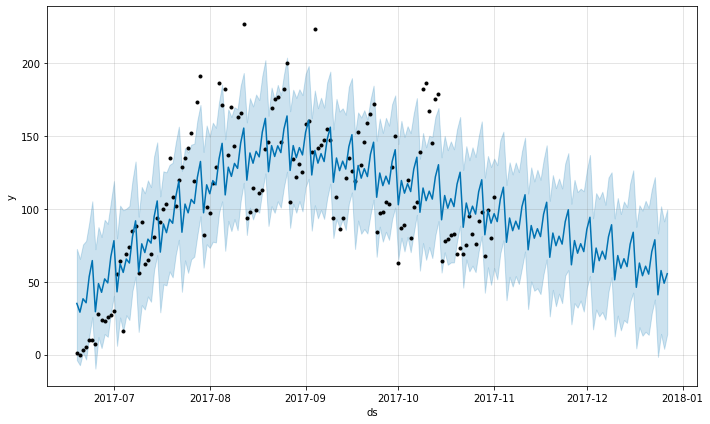

In [55]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

Let's record the RMSE for each product to see the accuarcy of the predictions

In [56]:
se = np.square(forecast.yhat.loc[:136] - df_p1.Units)
mse = np.mean(se)
rmse1 = np.sqrt(mse)
rmse1

30.415279842290236

Let's see the forecast for the 1st product.

Let's see the trends in the overall, daily and weekly data.

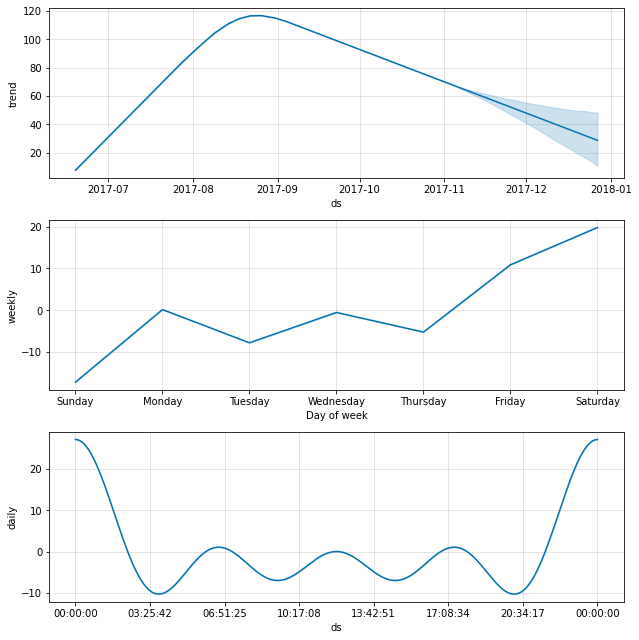

In [57]:
fig1 = prophet_basic.plot_components(forecast)

In [58]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-06-19,7.78,-3.74,72.54,7.78,7.78,27.36,27.36,27.36,27.21,27.21,27.21,0.15,0.15,0.15,0.00,0.00,0.00,35.14
1,2017-06-20,9.73,-7.23,65.72,9.73,9.73,19.41,19.41,19.41,27.21,27.21,27.21,-7.80,-7.80,-7.80,0.00,0.00,0.00,29.14
2,2017-06-21,11.68,1.65,75.57,11.68,11.68,26.67,26.67,26.67,27.21,27.21,27.21,-0.54,-0.54,-0.54,0.00,0.00,0.00,38.34
3,2017-06-22,13.62,-3.29,78.05,13.62,13.62,21.97,21.97,21.97,27.21,27.21,27.21,-5.24,-5.24,-5.24,0.00,0.00,0.00,35.60
4,2017-06-23,15.57,12.42,90.43,15.57,15.57,38.08,38.08,38.08,27.21,27.21,27.21,10.87,10.87,10.87,0.00,0.00,0.00,53.65


Now, we need the "yhat" value from 29th October 2017 to 16th December 2017 in a weekly format

In [59]:
# Converting the index as date format 
forecast.ds=pd.to_datetime(forecast.ds)

In [60]:
# Lets convert the forecasted data into a weekly format by spliting the 56 days in 8 weeks
forecast_p1=forecast[(forecast.ds>='2017-10-29')&(forecast.ds<='2017-12-16')].copy()
forecast_p1['WEEKLY']=pd.cut(forecast_p1.ds, 8)
forecast_p1.groupby('WEEKLY')['yhat'].sum()
forecast_p1 = forecast_p1.groupby('WEEKLY')['yhat'].sum()
final_forecast=pd.DataFrame(forecast_p1)
final_forecast.rename(columns={'yhat':'Product1'}, inplace=True)
final_forecast.Product1=final_forecast.Product1.astype(int)

WEEKLY
(2017-10-28 22:50:52.800000, 2017-11-04]   680.65
(2017-11-04, 2017-11-10]                   534.94
(2017-11-10, 2017-11-16]                   517.40
(2017-11-16, 2017-11-22]                   507.04
(2017-11-22, 2017-11-28]                   475.88
(2017-11-28, 2017-12-04]                   456.67
(2017-12-04, 2017-12-10]                   422.26
(2017-12-10, 2017-12-16]                   413.16
Name: yhat, dtype: float64

In [61]:
final_forecast

,Product1
WEEKLY,
"(2017-10-28 22:50:52.800000, 2017-11-04]",680
"(2017-11-04, 2017-11-10]",534
"(2017-11-10, 2017-11-16]",517
"(2017-11-16, 2017-11-22]",507
"(2017-11-22, 2017-11-28]",475
"(2017-11-28, 2017-12-04]",456
"(2017-12-04, 2017-12-10]",422
"(2017-12-10, 2017-12-16]",413


Let's use the same method for product 2, 3, 4 and 5. We will plot the fit in each case as well.

### Forecasting - Product 2

In [62]:
# preparing the data into FBP format:
train_dataset = df_p2
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['SalesDate', 'Units']]
train_dataset.columns = ["ds", "y"]

train_dataset = train_dataset.sample(len(df_p2))
prophet_basic = Prophet(daily_seasonality=True,weekly_seasonality=True)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -9.7249
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      84       119.706   2.65465e-05       78.2899   4.102e-07       0.001      151  LS failed, Hessian reset 
      99       119.708   8.44988e-07       66.1733           1           1      171   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       119.708   3.43025e-09       61.3419      0.1507      0.1507      188   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


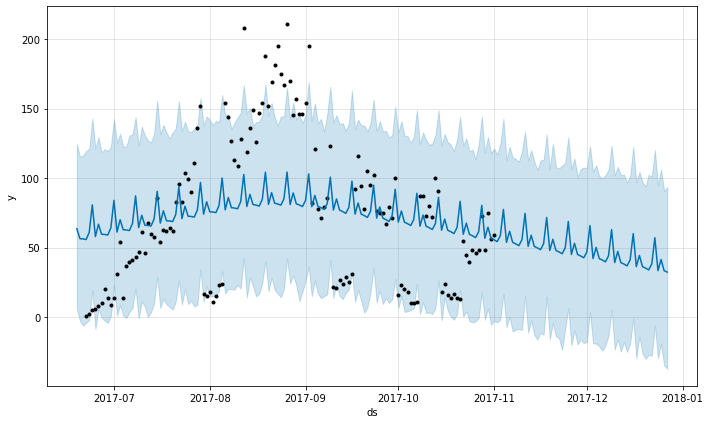

In [63]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

In [64]:
se = np.square(forecast.yhat.loc[:136] - df_p2.Units)
mse = np.mean(se)
rmse2 = np.sqrt(mse)
rmse2

49.594032856210966

In [65]:
# Lets convert the forecasted data into a weekly format by spliting the 56 days in 8 weeks
forecast_p2=forecast[(forecast.ds>='2017-10-29')&(forecast.ds<='2017-12-16')].copy()
forecast_p2['WEEKLY']=pd.cut(forecast_p2.ds, 8)
forecast_p2.groupby('WEEKLY')['yhat'].sum()
forecast_p2 = forecast_p2.groupby('WEEKLY')['yhat'].sum()
final_forecast['Product2']=forecast_p2
final_forecast.Product2=final_forecast.Product2.astype(int)

WEEKLY
(2017-10-28 22:50:52.800000, 2017-11-04]   424.11
(2017-11-04, 2017-11-10]                   329.21
(2017-11-10, 2017-11-16]                   333.61
(2017-11-16, 2017-11-22]                   323.34
(2017-11-22, 2017-11-28]                   307.53
(2017-11-28, 2017-12-04]                   291.96
(2017-12-04, 2017-12-10]                   269.41
(2017-12-10, 2017-12-16]                   262.89
Name: yhat, dtype: float64

In [66]:
final_forecast

,Product1,Product2
WEEKLY,,
"(2017-10-28 22:50:52.800000, 2017-11-04]",680,424
"(2017-11-04, 2017-11-10]",534,329
"(2017-11-10, 2017-11-16]",517,333
"(2017-11-16, 2017-11-22]",507,323
"(2017-11-22, 2017-11-28]",475,307
"(2017-11-28, 2017-12-04]",456,291
"(2017-12-04, 2017-12-10]",422,269
"(2017-12-10, 2017-12-16]",413,262


### Forecasting - Product 3

In [67]:
# preparing the data into FBP format:
train_dataset = df_p3
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['SalesDate', 'Units']]
train_dataset.columns = ["ds", "y"]

train_dataset = train_dataset.sample(len(df_p3))
prophet_basic = Prophet(daily_seasonality=True,weekly_seasonality=True)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -7.31161


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       181.531   5.00063e-05       79.1339      0.9525      0.9525      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     108        181.62    0.00144758       89.0574   1.405e-05       0.001      184  LS failed, Hessian reset 
     166       181.725   1.53236e-05       80.4156   1.832e-07       0.001      303  LS failed, Hessian reset 
     199       181.727   1.45997e-07       66.5448           1           1      343   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       181.727   1.53807e-06       76.6209   1.912e-08       0.001      385  LS failed, Hessian reset 
     237       181.727   1.60304e-07       69.2951   2.059e-09       0.001      464  LS failed, Hessian reset 
     243       181.727   1.27249e-08       61.7449      0.7158      0.7158      471   
Optimization termin

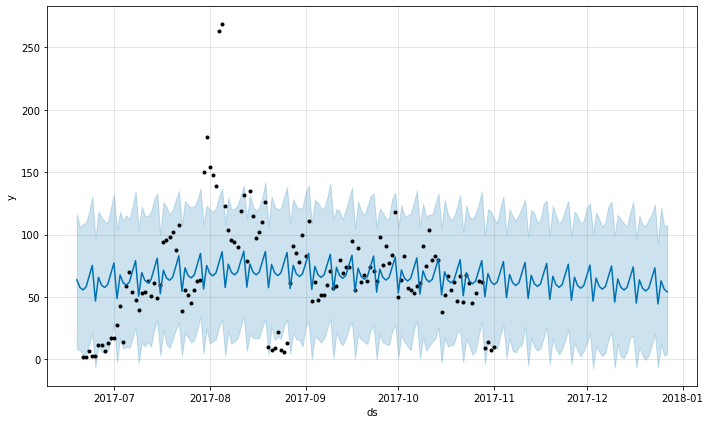

In [68]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

In [69]:
se = np.square(forecast.yhat.loc[:136] - df_p3.Units)
mse = np.mean(se)
rmse3 = np.sqrt(mse)
rmse3

42.79176634962543

In [70]:
# Lets convert the forecasted data into a weekly format by spliting the 56 days in 8 weeks
forecast_p3=forecast[(forecast.ds>='2017-10-29')&(forecast.ds<='2017-12-16')].copy()
forecast_p3['WEEKLY']=pd.cut(forecast_p3.ds, 8)
forecast_p3.groupby('WEEKLY')['yhat'].sum()
forecast_p3 = forecast_p3.groupby('WEEKLY')['yhat'].sum()
final_forecast['Product3']=forecast_p3
final_forecast.Product3=final_forecast.Product3.astype(int)

WEEKLY
(2017-10-28 22:50:52.800000, 2017-11-04]   452.20
(2017-11-04, 2017-11-10]                   369.38
(2017-11-10, 2017-11-16]                   373.83
(2017-11-16, 2017-11-22]                   378.54
(2017-11-22, 2017-11-28]                   377.03
(2017-11-28, 2017-12-04]                   371.20
(2017-12-04, 2017-12-10]                   360.91
(2017-12-10, 2017-12-16]                   375.82
Name: yhat, dtype: float64

In [71]:
final_forecast

,Product1,Product2,Product3
WEEKLY,,,
"(2017-10-28 22:50:52.800000, 2017-11-04]",680,424,452
"(2017-11-04, 2017-11-10]",534,329,369
"(2017-11-10, 2017-11-16]",517,333,373
"(2017-11-16, 2017-11-22]",507,323,378
"(2017-11-22, 2017-11-28]",475,307,377
"(2017-11-28, 2017-12-04]",456,291,371
"(2017-12-04, 2017-12-10]",422,269,360
"(2017-12-10, 2017-12-16]",413,262,375


### Forecasting - Product 4

In [72]:
# preparing the data into FBP format:
train_dataset = df_p4
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['SalesDate', 'Units']]
train_dataset.columns = ["ds", "y"]

train_dataset = train_dataset.sample(len(df_p4))
prophet_basic = Prophet(daily_seasonality=True,weekly_seasonality=True)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -13.9174


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       152.858   0.000156305       68.6738      0.3919      0.3919      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152        152.98    0.00141703       72.6252   1.854e-05       0.001      224  LS failed, Hessian reset 
     199       153.033   0.000172348        75.916       0.122           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       153.118   0.000302301       83.5262   3.988e-06       0.001      365  LS failed, Hessian reset 
     282       153.151   6.57618e-06       54.5936   8.073e-08       0.001      501  LS failed, Hessian reset 
     299       153.151   5.22565e-07       54.5996      0.9153      0.9153      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       153.156   8.74894e-09  

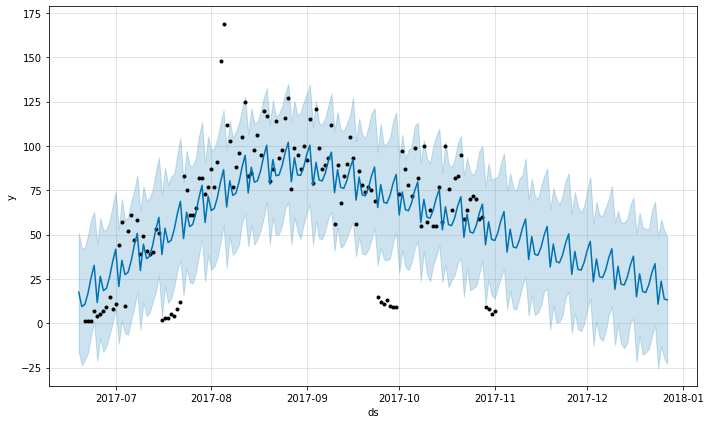

In [73]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

In [74]:
se = np.square(forecast.yhat.loc[:136] - df_p4.Units)
mse = np.mean(se)
rmse4 = np.sqrt(mse)
rmse4

28.460746280476908

In [75]:
# Lets convert the forecasted data into a weekly format by spliting the 56 days in 8 weeks
forecast_p4=forecast[(forecast.ds>='2017-10-29')&(forecast.ds<='2017-12-16')].copy()
forecast_p4['WEEKLY']=pd.cut(forecast_p4.ds, 8)
forecast_p4.groupby('WEEKLY')['yhat'].sum()
forecast_p4 = forecast_p4.groupby('WEEKLY')['yhat'].sum()
final_forecast['Product4']=forecast_p4
final_forecast.Product4=final_forecast.Product4.astype(int)

WEEKLY
(2017-10-28 22:50:52.800000, 2017-11-04]   367.53
(2017-11-04, 2017-11-10]                   279.38
(2017-11-10, 2017-11-16]                   263.48
(2017-11-16, 2017-11-22]                   249.35
(2017-11-22, 2017-11-28]                   232.76
(2017-11-28, 2017-12-04]                   211.24
(2017-12-04, 2017-12-10]                   180.25
(2017-12-10, 2017-12-16]                   172.25
Name: yhat, dtype: float64

In [76]:
final_forecast

,Product1,Product2,Product3,Product4
WEEKLY,,,,
"(2017-10-28 22:50:52.800000, 2017-11-04]",680,424,452,367
"(2017-11-04, 2017-11-10]",534,329,369,279
"(2017-11-10, 2017-11-16]",517,333,373,263
"(2017-11-16, 2017-11-22]",507,323,378,249
"(2017-11-22, 2017-11-28]",475,307,377,232
"(2017-11-28, 2017-12-04]",456,291,371,211
"(2017-12-04, 2017-12-10]",422,269,360,180
"(2017-12-10, 2017-12-16]",413,262,375,172


### Forecasting - Product 5

In [77]:
# preparing the data into FBP format:
train_dataset = df_p5
train_dataset.reset_index(level=0, inplace=True)
train_dataset = train_dataset[['SalesDate', 'Units']]
train_dataset.columns = ["ds", "y"]

train_dataset = train_dataset.sample(len(df_p5))
prophet_basic = Prophet(daily_seasonality=True,weekly_seasonality=True)
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -10.3142
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       145.013   2.28934e-05       73.6612      0.2478      0.2478      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       145.053    0.00012385       61.6655   1.579e-06       0.001      185  LS failed, Hessian reset 
     193       145.062   9.85092e-09       64.7791      0.1371      0.1371      320   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


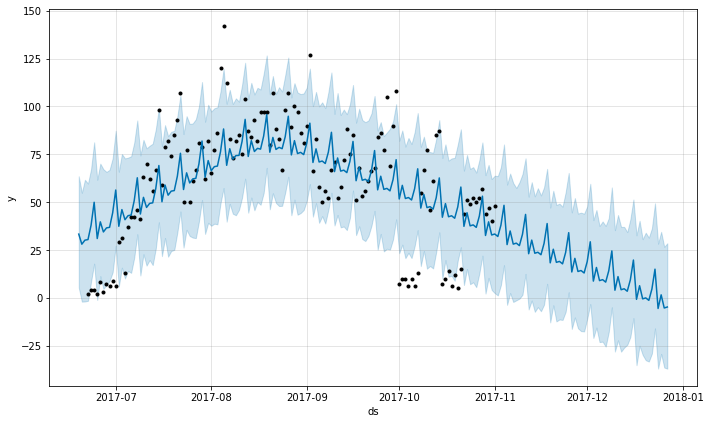

In [78]:
forecast=prophet_basic.predict(future)

#Plotting the predicted data
fig1 =prophet_basic.plot(forecast)

In [79]:
se = np.square(forecast.yhat.loc[:136] - df_p5.Units)
mse = np.mean(se)
rmse5 = np.sqrt(mse)
rmse5

25.52721138582253

In [80]:
# Lets convert the forecasted data into a weekly format by spliting the 56 days in 8 weeks
forecast_p5=forecast[(forecast.ds>='2017-10-29')&(forecast.ds<='2017-12-16')].copy()
forecast_p5['WEEKLY']=pd.cut(forecast_p5.ds, 8)
forecast_p5.groupby('WEEKLY')['yhat'].sum()
forecast_p5 = forecast_p5.groupby('WEEKLY')['yhat'].sum()
final_forecast['Product5']=forecast_p5
final_forecast.Product5=final_forecast.Product5.astype(int)

WEEKLY
(2017-10-28 22:50:52.800000, 2017-11-04]   256.71
(2017-11-04, 2017-11-10]                   179.78
(2017-11-10, 2017-11-16]                   166.32
(2017-11-16, 2017-11-22]                   148.41
(2017-11-22, 2017-11-28]                   123.29
(2017-11-28, 2017-12-04]                    99.97
(2017-12-04, 2017-12-10]                    69.27
(2017-12-10, 2017-12-16]                    52.56
Name: yhat, dtype: float64

In [81]:
final_forecast['Week']=['Week 1 : From 10/29/2017',\
                        'Week 2 : From 11/05/2017',\
                        'Week 3 : From 11/12/2017',\
                        'Week 4 : From 11/19/2017',\
                        'Week 5 : From 11/26/2017',\
                        'Week 6 : From 12/03/2017',\
                        'Week 7 : From 12/10/2017',\
                        'Week 8 : From 12/17/2017']

In [82]:
final_forecast.reset_index(inplace=True)

In [83]:
final_forecast.drop(columns='WEEKLY',inplace=True)

In [84]:
final_forecast=final_forecast.set_index('Week')

In [85]:
final_forecast

,Product1,Product2,Product3,Product4,Product5
Week,,,,,
Week 1 : From 10/29/2017,680,424,452,367,256
Week 2 : From 11/05/2017,534,329,369,279,179
Week 3 : From 11/12/2017,517,333,373,263,166
Week 4 : From 11/19/2017,507,323,378,249,148
Week 5 : From 11/26/2017,475,307,377,232,123
Week 6 : From 12/03/2017,456,291,371,211,99
Week 7 : From 12/10/2017,422,269,360,180,69
Week 8 : From 12/17/2017,413,262,375,172,52


Used this command to export to csv -
- final_forecast.to_csv('Top_5_Products_Forecast.csv')